In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def union(r1,r2,big) :
  if r2 != r1 :
    if ptr[r1] > ptr[r2] :
      ptr[r2] += ptr[r1]
      ptr[r1] = r2
      r1 = r2
    else :
      ptr[r1] += ptr[r2]
      ptr[r2] = r1
    if -ptr[r1] > big :
      big = -ptr[r1]
  return r1, r2, big

In [2]:
def find(i) :
  if ptr[i] < 0 :
    return i
  else :
    ptr[i] = find(ptr[i])
    return ptr[i]

In [66]:
L = 256
N = L**2
K = np.full(N, 4, int)

indices = np.arange(N)
left  = indices - 1 + L * (indices % L == 0)
right = indices + 1 - L * (indices % L == L - 1)
up    = indices - L + N * (indices // L == 0)
down  = indices + L - N * (indices // L == L - 1)

nn = np.stack([left, right, up, down], axis=1)

In [67]:
order = np.arange(0,N)
np.random.shuffle(order)

big = 0
big_values = []
ptr = np.full(N,-N-1)

for i in range(N) :
  r1,s1 = order[i],order[i]
  ptr[s1] = -1
  for j in range(4) :
    s2 = nn[s1,j]
    if ptr[s2] != -N-1 :
      r2 = find(s2)
      r1,r2,big = union(r1,r2,big)
  big_values.append(big/N)

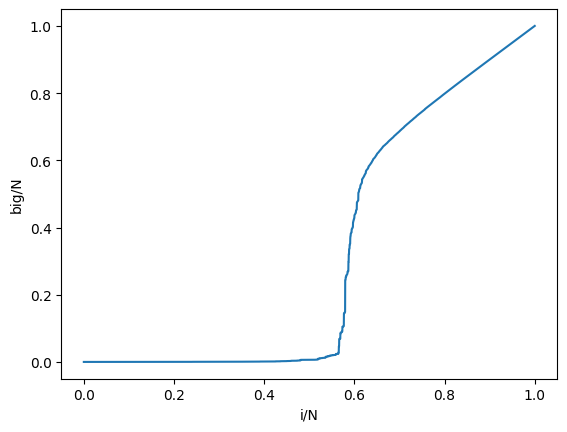

In [68]:
x_values = np.arange(0, N)/N
y_values = big_values

plt.plot(x_values, y_values)
plt.xlabel('i/N')
plt.ylabel('big/N')
plt.show()